# Time Series Analysis 

## Contents: 
1. Imports & Setup
2. Plotting TVTVR
3. Plotting TVTVR '09 - '16
4. Cleaning Data
5. Time-series Analysis: Decomposition
6. Dickey-Fuller Test
      - Round of Differencing
      - Retesting
      - Autocorrelation

### 1. Imports & Setup

In [1]:
# Import libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels
import os
import warnings # This is a library that handles warnings

plt.style.use('fivethirtyeight') # Styling for plots

warnings.filterwarnings("ignore") # Disable deprecation warnings 

In [2]:
# Configure API key

quandl.ApiConfig.api_key = 'UnHN7zhCzxzZ9teQQRmn'

In [3]:
# Importing the "Bitcoin Data Insights" variable (https://data.nasdaq.com/databases/BCHAIN)

data = quandl.get_table(datatable_code = 'QDL/BCHAIN')

In [4]:
data.head(5)

,code,date,value
None,,,
0,TVTVR,2016-07-17,60.5821
1,TVTVR,2016-07-16,93.1541
2,TVTVR,2016-07-15,76.3548
3,TVTVR,2016-07-14,86.4739
4,TVTVR,2016-07-13,39.4733


In [5]:
data.shape

(10000, 3)

In [6]:
data.columns

Index(['code', 'date', 'value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data['code'].value_counts()

code
TRVOU    5911
TVTVR    2753
TRFUS    1336
Name: count, dtype: int64

In [9]:
# TVTVR Bitcoin Trade Volume vs Transaction Volume Ratio

# TRVOU Bitcoin USD Exchange Trade Volume	

# TRFUS Bitcoin Total Transaction Fees USD

In [10]:
# Create subset of just TVTVR values

subset_v = data[data['code'] == 'TVTVR']

In [11]:
subset_v.head(5)

,code,date,value
None,,,
0,TVTVR,2016-07-17,60.5821
1,TVTVR,2016-07-16,93.1541
2,TVTVR,2016-07-15,76.3548
3,TVTVR,2016-07-14,86.4739
4,TVTVR,2016-07-13,39.4733


In [12]:
subset_v.shape

(2753, 3)

In [13]:
subset_v.columns

Index(['code', 'date', 'value'], dtype='object')

In [14]:
# Set 'date' column as index

subset_v['date'] = pd.to_datetime(subset_v['date'])
subset_v.set_index('date', inplace=True)

In [15]:
# remove 'code' column 

subset_v.drop('code', axis=1, inplace=True)

In [16]:
subset_v.head(5)

,value
date,
2016-07-17,60.5821
2016-07-16,93.1541
2016-07-15,76.3548
2016-07-14,86.4739
2016-07-13,39.4733


In [17]:
subset_v.shape

(2753, 1)

In [18]:
type(subset_v)

pandas.core.frame.DataFrame

### 2. Plotting TVTVR

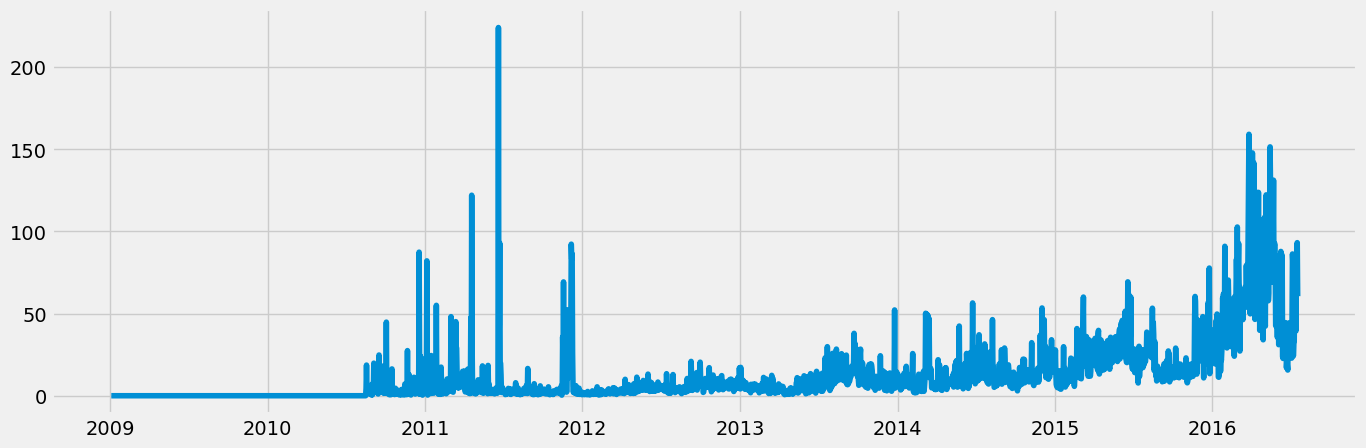

In [19]:
# Plot the data using matplotlib.

volume_plot = plt.figure(figsize=(15,5), dpi=100) 

plt.plot(subset_v)

Data is daily from 2009 to 2016. 

Will create a subset for 2011 - 2016 since 2009 and 2010 have 0 to very low data values. 

To note: Bitcoin started in 2009. 

### 3. Plotting TVTVR 09 - 16

In [134]:
# Reset index to filter by 'date'

subset_v2 = subset_v.reset_index()

In [135]:
subset_v2.head()

,date,value
0,2016-07-17,60.5821
1,2016-07-16,93.1541
2,2016-07-15,76.3548
3,2016-07-14,86.4739
4,2016-07-13,39.4733


In [136]:
# Create 09-16 subset

subset_v3 = subset_v2[subset_v2['date'] > '2010-12-31']

In [137]:
subset_v3.shape

(2025, 2)

In [138]:
subset_v3.head()

,date,value
0,2016-07-17,60.5821
1,2016-07-16,93.1541
2,2016-07-15,76.3548
3,2016-07-14,86.4739
4,2016-07-13,39.4733


In [139]:
# Reverse dataframe (ASC)

subset_v3.iloc[:] = subset_v3.iloc[::-1].values

In [140]:
subset_v3.head()

,date,value
0,2011-01-01,4.3115
1,2011-01-02,7.0291
2,2011-01-03,4.4741
3,2011-01-04,11.3355
4,2011-01-05,82.0859


In [141]:
subset_v3.isnull().sum()

date     0
value    0
dtype: int64

In [143]:
# Smoothing data 

# Define the window size 
window_size = 365 # daily data

# Calculate the moving average
subset_v3['smoothed'] = subset_v3['value'].rolling(window=window_size, min_periods=1).mean()

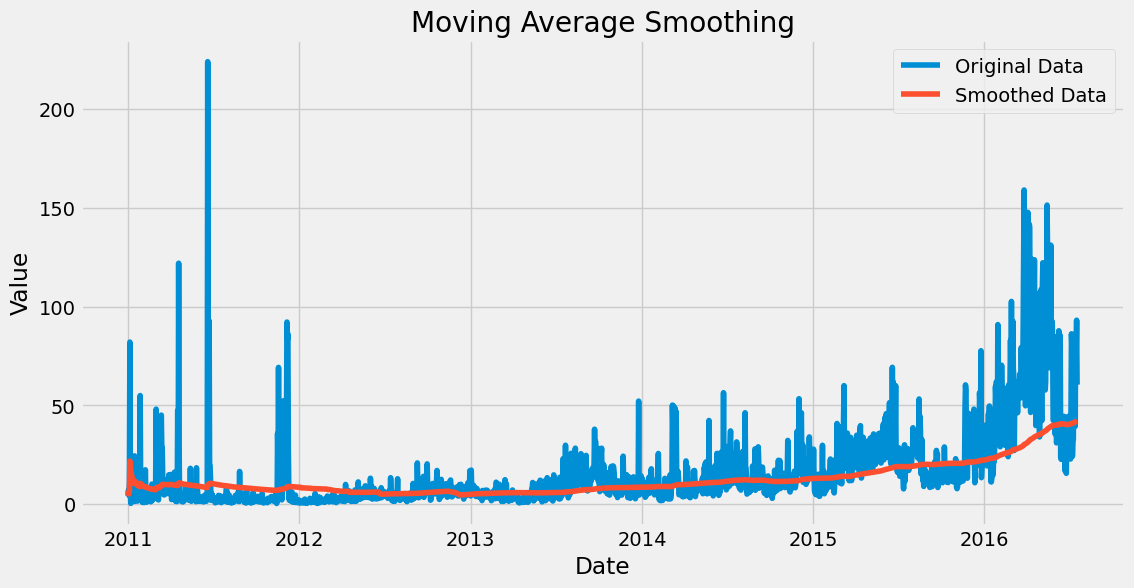

In [144]:
# Plot smoothed data 

plt.figure(figsize=(12, 6))
plt.plot(subset_v3['date'], subset_v3['value'], label='Original Data')
plt.plot(subset_v3['date'], subset_v3['smoothed'], label='Smoothed Data')
plt.legend()
plt.title('Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [145]:
# Rename columns 

subset_v3 = subset_v3.rename(columns={'value': 'original_value', 'smoothed': 'smoothed_value'})

In [146]:
subset_v3.head()

,date,original_value,smoothed_value
0,2011-01-01,4.3115,4.311500
1,2011-01-02,7.0291,5.670300
2,2011-01-03,4.4741,5.271567
3,2011-01-04,11.3355,6.787550
4,2011-01-05,82.0859,21.847220


In [147]:
# Set the "Date" column as the index

from datetime import datetime

subset_v3['datetime'] = pd.to_datetime(subset_v3['date']) # Create a datetime 
subset_v3 = subset_v3.set_index('datetime') # Set the datetime as the index 
subset_v3.drop(['date'], axis=1, inplace=True) # Drop the "date" column
subset_v3.head()

,original_value,smoothed_value
datetime,,
2011-01-01,4.3115,4.311500
2011-01-02,7.0291,5.670300
2011-01-03,4.4741,5.271567
2011-01-04,11.3355,6.787550
2011-01-05,82.0859,21.847220


In [148]:
# Create new df of only smoothed_value

df_smoothed = subset_v3[['smoothed_value']].copy()

In [149]:
df_smoothed.head()

,smoothed_value
datetime,
2011-01-01,4.311500
2011-01-02,5.670300
2011-01-03,5.271567
2011-01-04,6.787550
2011-01-05,21.847220


In [150]:
df_smoothed.shape

(2025, 1)

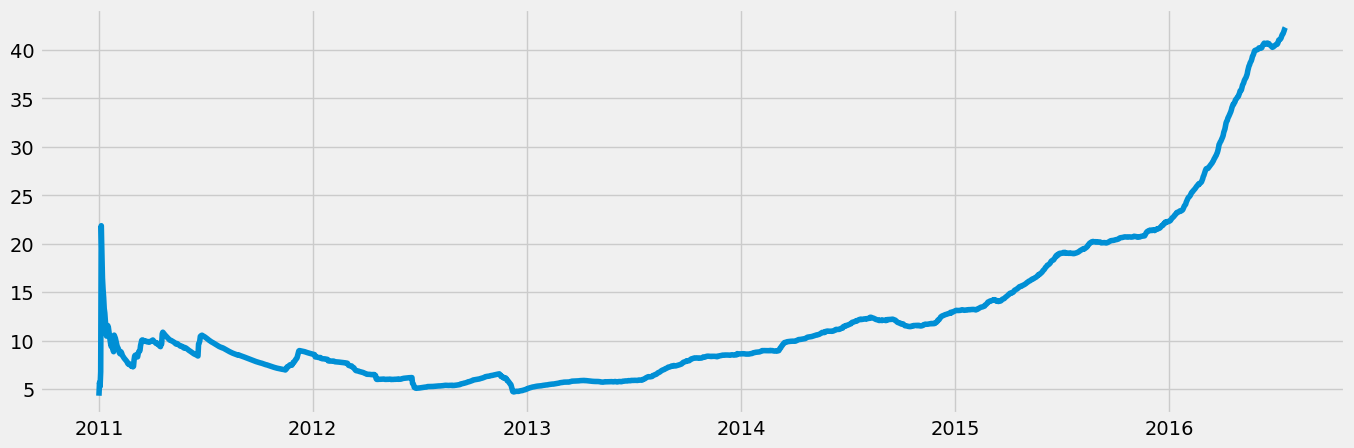

In [152]:
# Plot the smoothed data set

smoothed_plot = plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_smoothed)

### 4. Cleaning Data

In [153]:
# Check for missing values 

df_smoothed.isnull().sum()

smoothed_value    0
dtype: int64

In [154]:
# Check for duplicates

dups = df_smoothed.duplicated()
dups.sum()

0

### 5. Time-series Analysis: Decomposition

In [155]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_smoothed, model='additive')

In [156]:
from pylab import rcParams # define a fixed size for all special charts

rcParams['figure.figsize'] = 18, 7

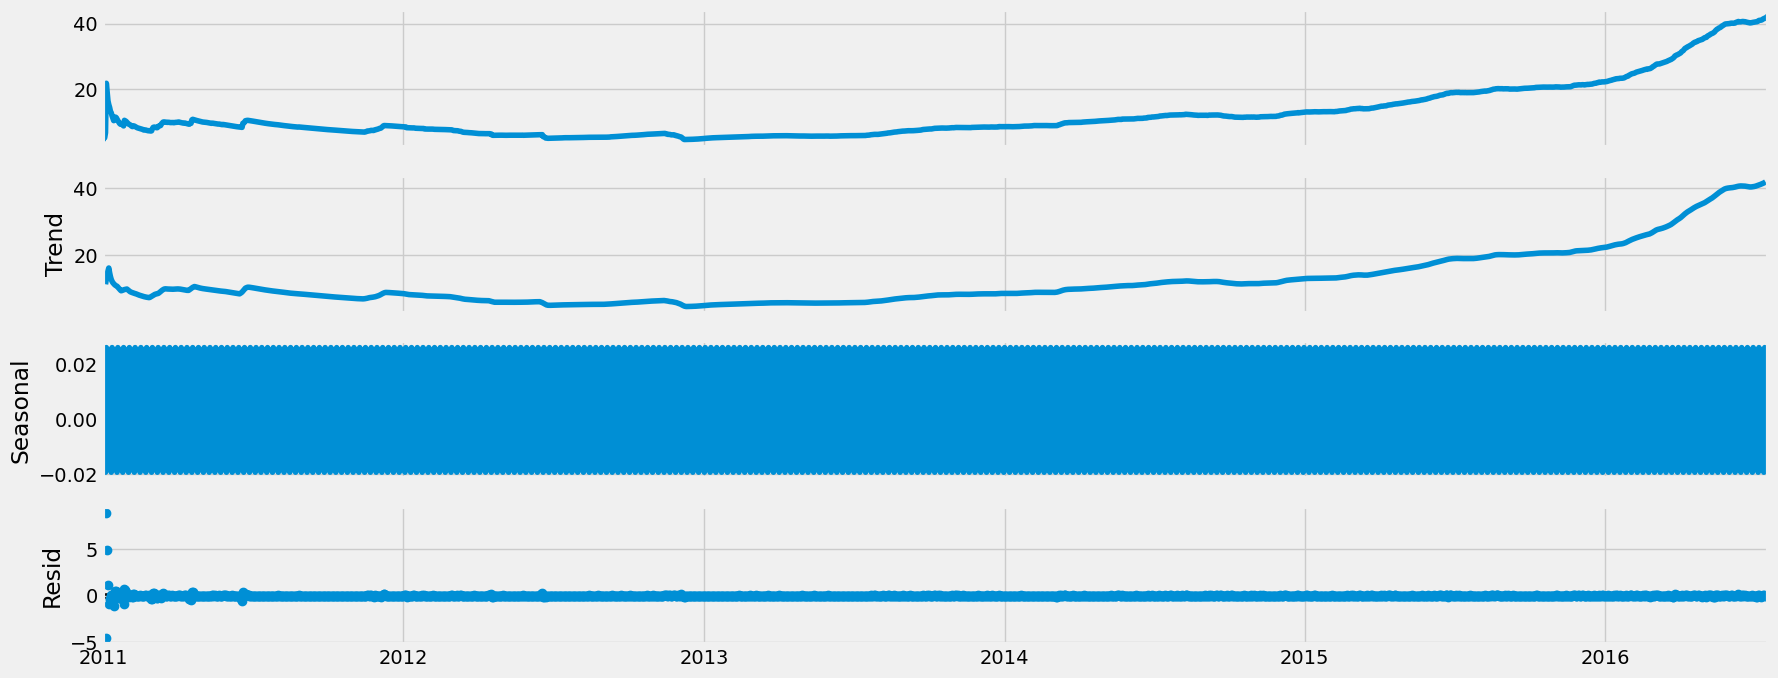

In [157]:
# Plot the separate components

decomposition.plot()
plt.show()

##### Observations: 
Trend
1. The level and trend lines vary slightly at the beginning
2. Beginning has a small spike, gradually decreases, and fluctuations after
3. Around 2015, the trend like gradually increases, surpassing it's initial spike in 2011

Seasonal
1. No seasonality - the line does not go far from 0

Residual
1. Most points are around 0
2. One -5 value, and two 5 and over. Perhaps outliers?

### 6. Dickey-Fuller Test

In [158]:
# Check for stationarity

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_smoothed['smoothed_value'])

Dickey-Fuller Stationarity test:
Test Statistic                    3.985781
p-value                           1.000000
Number of Lags Used              26.000000
Number of Observations Used    1998.000000
Critical Value (1%)              -3.433627
Critical Value (5%)              -2.862988
Critical Value (10%)             -2.567541
dtype: float64


Null-hypothesis: There is a unit root

1. Because the Test Statistic value is larger than all three Critical Value values, so the null-hypothesis cannot be rejected
2. This data set is likely not-stationary

#### Round of Differencing

In [159]:
data_diff = df_smoothed - df_smoothed.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [160]:
# Remove the missing values that came about as a result of the differencing

data_diff.dropna(inplace = True)

In [161]:
data_diff.head()

,smoothed_value
datetime,
2011-01-02,1.358800
2011-01-03,-0.398733
2011-01-04,1.515983
2011-01-05,15.059670
2011-01-06,-2.695553


In [162]:
data_diff.columns

Index(['smoothed_value'], dtype='object')

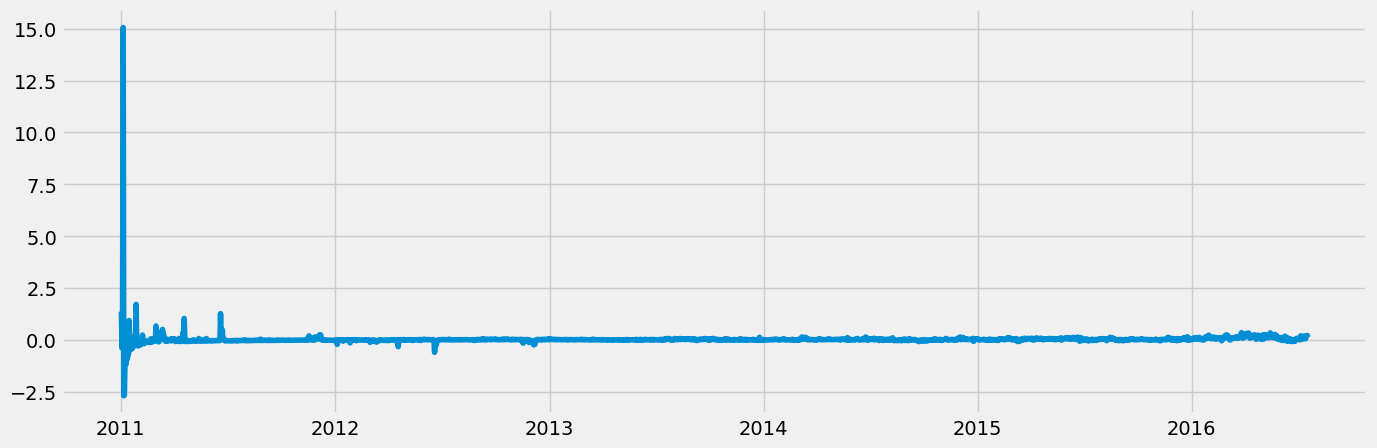

In [163]:
# Check out what the differencing did to the time-series curve

differencing_plot = plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [164]:
# Recheck stationarity 

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                   -5.481327
p-value                           0.000002
Number of Lags Used              26.000000
Number of Observations Used    1997.000000
Critical Value (1%)              -3.433629
Critical Value (5%)              -2.862988
Critical Value (10%)             -2.567541
dtype: float64


Null-hypothesis: There is a unit root 

1. Because the Test Statistic is smaller than the Critical Values, the null-hypothesis can be rejected
2. There is no unit root so the data is now stationary

#### Check autocorrelations

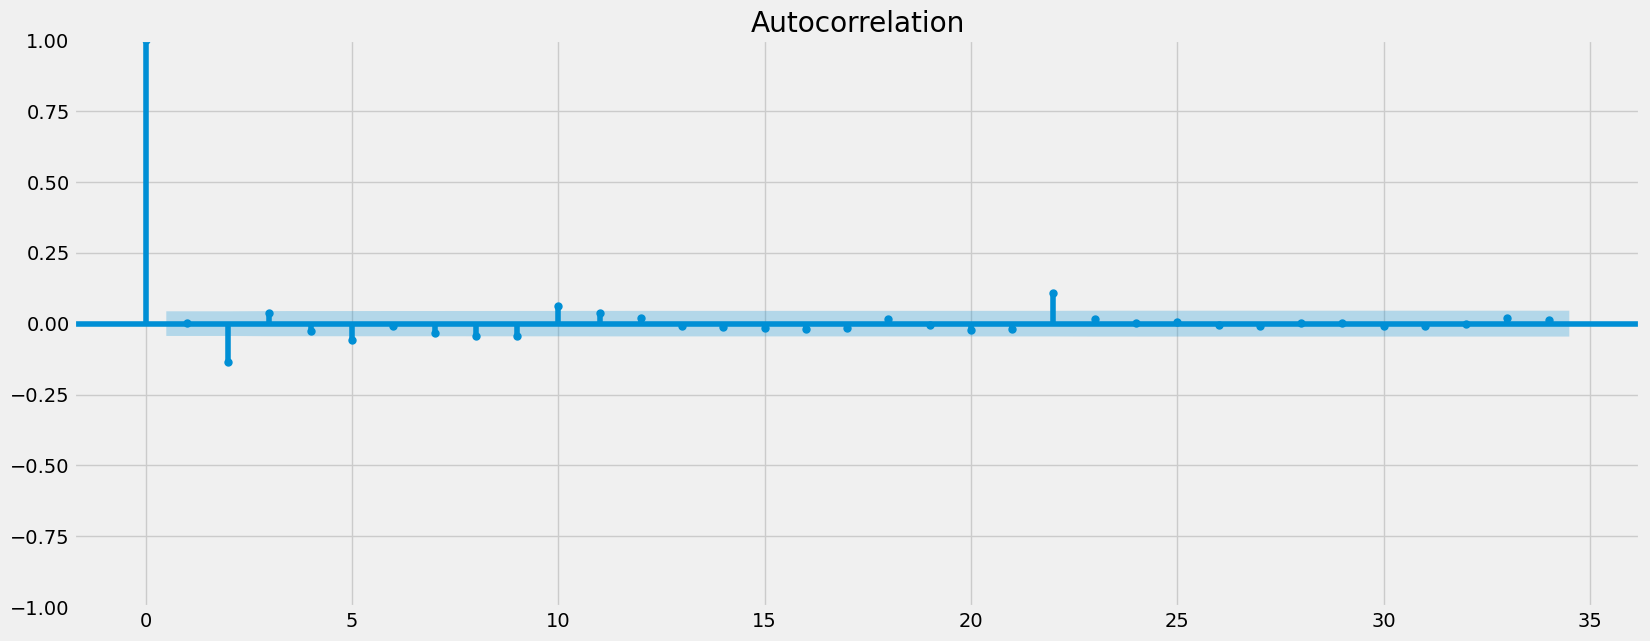

In [168]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Import the autocorrelation and partial correlation plots

differencing_autocorrelation = plot_acf(data_diff)
plt.show()

##### Observations: 
1. One large spike at 1 at the beginning
2. Other lags are below zero or close above 0, staying close to the confidence interval
3. This could be random
4. Dataset is likely stationary